In [92]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score



In [93]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14

In [94]:
df = pd.read_csv('D:/du lieu o cu/Statistics and Machine Learning Course/TH3/TH3/data/Ads.txt', delim_whitespace=True)
df

,Id,youtube,facebook,newspaper,sales
0,1,276.12,45.36,83.04,26.52
1,2,53.40,47.16,54.12,12.48
2,3,20.64,55.08,83.16,11.16
3,4,181.80,49.56,70.20,22.20
4,5,216.96,12.96,70.08,15.48
...,...,...,...,...,...
194,196,45.84,4.44,16.56,9.12
195,197,113.04,5.88,9.72,11.64
196,198,212.40,11.16,7.68,15.36
197,199,340.32,50.40,79.44,30.60


In [95]:
df = df.drop('Id', axis= 'columns')
missing_values = df.isnull().sum()
missing_values

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [96]:
# a) Mô tả dữ liệu với các trị thống kê: min, max, tứ phân vị.
df.describe()

,youtube,facebook,newspaper,sales
count,199.000000,199.000000,199.000000,199.000000
mean,176.749749,28.011256,36.805628,16.853065
std,103.198035,17.810830,26.124069,6.265850
min,0.840000,0.000000,0.360000,1.920000
25%,88.860000,12.060000,15.420000,12.480000
50%,179.760000,27.960000,31.080000,15.480000
75%,262.980000,43.860000,54.120000,20.880000
max,355.680000,59.520000,136.800000,32.400000


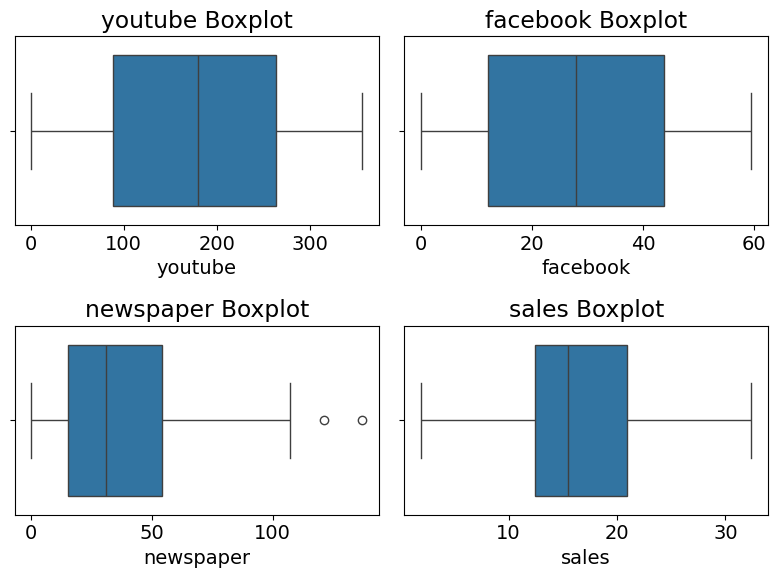

In [97]:
plt.figure(figsize=(8, 6))
for i, j in enumerate(df.describe().columns):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

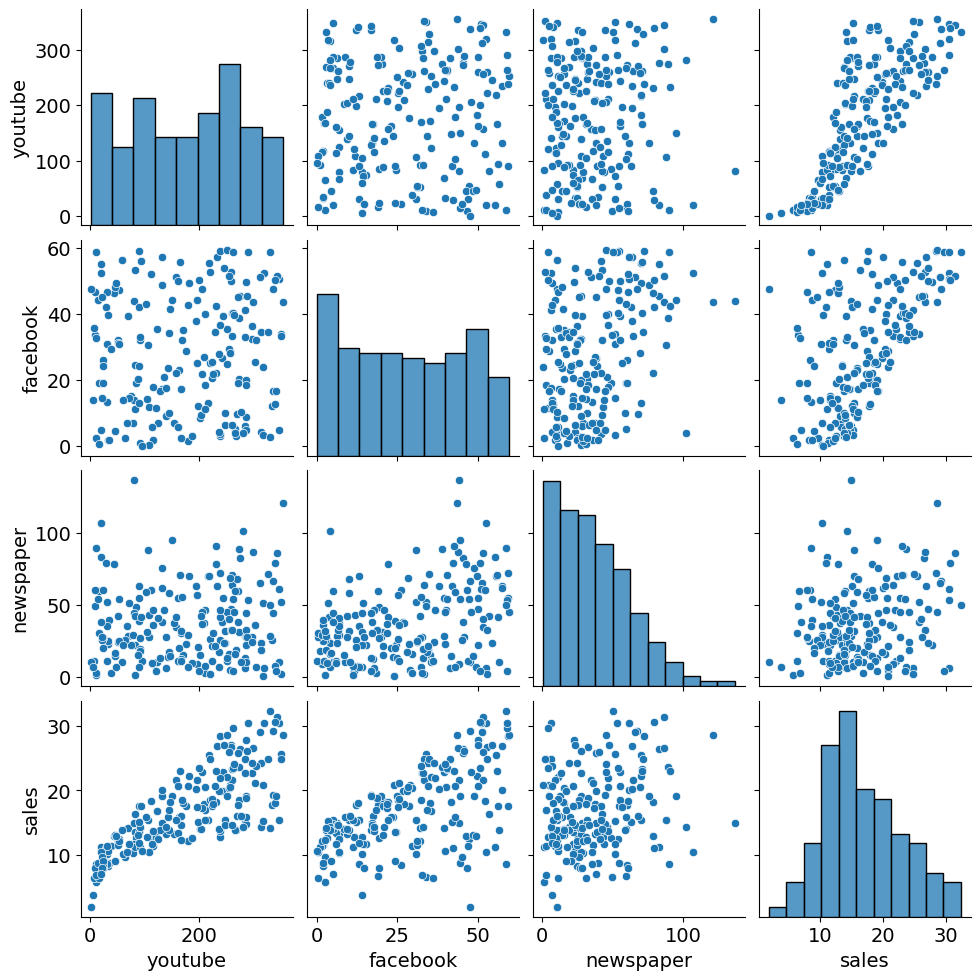

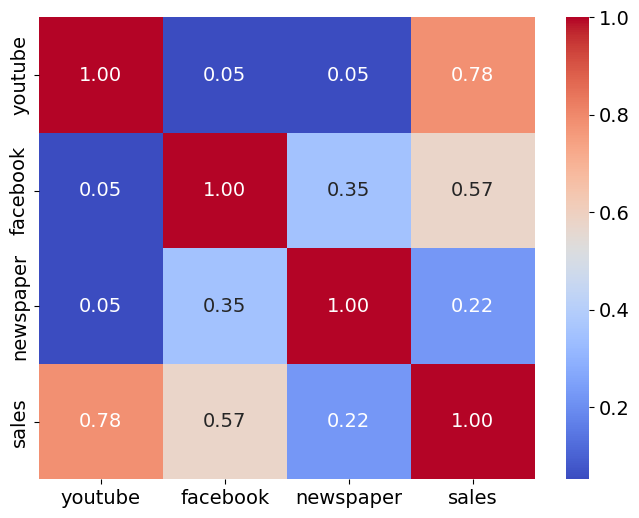

In [98]:
# b) Vẽ biểu đồ pairplot và heatmap thể hiện mức tương quan giữa chi phí đầu tư qua các
# kênh với doanh thu. Cho biết giá trị tương quan cụ thể?
# Pairplot
sns.pairplot(df)
plt.show()

# Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Xử lý outliers bằng Winsorization

In [99]:
from scipy import stats

def winsorize_columns(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for col in columns:
        df[col] = stats.mstats.winsorize(df[col], limits=[lower_percentile, 1-upper_percentile])
    return df

columns_to_winsorize = ['newspaper']
df_copy_temp = winsorize_columns(df, columns_to_winsorize)

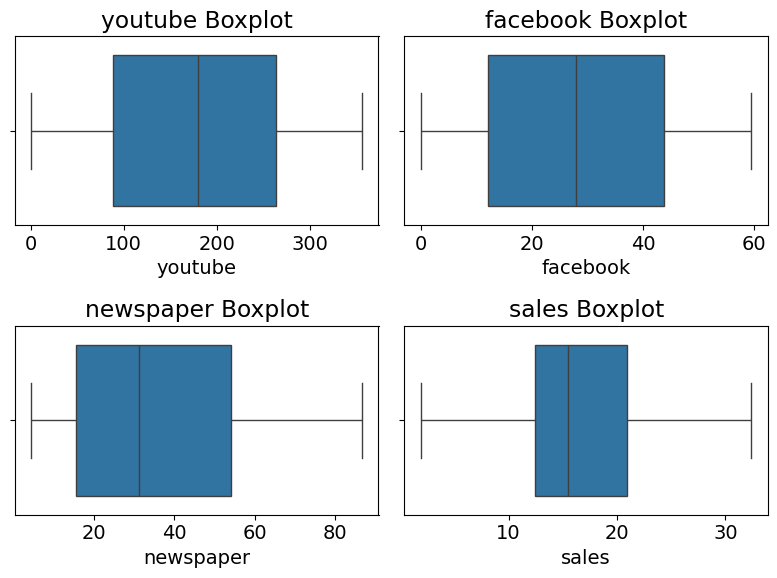

In [100]:
plt.figure(figsize=(8, 6))
for i, j in enumerate(df.describe().columns):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

VIF

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[['youtube', 'facebook', 'newspaper']]  # Features for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data

,Feature,VIF
0,youtube,2.533615
1,facebook,3.363013
2,newspaper,3.279182


Bining data

In [102]:
def bin_sale(sale):
    if sale < 10:
        return "Low"
    elif 10 <= sale <= 20:
        return "Medium"
    else:
        return "High"

df['sales_binned'] = df['sales'].apply(bin_sale)

In [103]:
# -– Cho biết số lượng mẫu tin theo doanh thu ứng với 3 mức phân hoạch?
sales_category_counts = df['sales_binned'].value_counts()
sales_category_counts

sales_binned
Medium    118
High       59
Low        22
Name: count, dtype: int64

In [104]:
X = df.drop(columns = ['sales_binned', 'sales'])
y = df['sales_binned']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Fit model
model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

# Evaluation metrics
class_report = classification_report(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
print(class_report)
print(cf)


              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 7  0  0]
 [ 0  4  0]
 [ 0  0 29]]


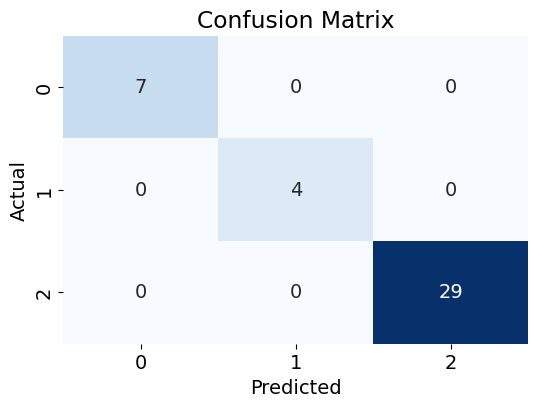

In [106]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, fmt='g', cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [107]:
k_fold = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(class_report)
print(cf)
print(k_fold)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 7  0  0]
 [ 0  4  0]
 [ 0  0 29]]
[0.9        0.95       0.95       0.975      0.84615385]


In [108]:
df

,youtube,facebook,newspaper,sales,sales_binned
0,276.12,45.36,83.04,26.52,High
1,53.40,47.16,54.12,12.48,Medium
2,20.64,55.08,83.16,11.16,Medium
3,181.80,49.56,70.20,22.20,High
4,216.96,12.96,70.08,15.48,Medium
...,...,...,...,...,...
194,45.84,4.44,16.56,9.12,Low
195,113.04,5.88,9.72,11.64,Medium
196,212.40,11.16,7.68,15.36,Medium
197,340.32,50.40,79.44,30.60,High


In [109]:
features = ['youtube', 'facebook', 'newspaper']
text_representation = tree.export_text(model, feature_names=features)
print(text_representation)

|--- facebook <= 32.22
|   |--- youtube <= 30.06
|   |   |--- class: Low
|   |--- youtube >  30.06
|   |   |--- facebook <= 23.76
|   |   |   |--- youtube <= 65.82
|   |   |   |   |--- facebook <= 9.18
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- facebook >  9.18
|   |   |   |   |   |--- class: Medium
|   |   |   |--- youtube >  65.82
|   |   |   |   |--- class: Medium
|   |   |--- facebook >  23.76
|   |   |   |--- youtube <= 253.80
|   |   |   |   |--- class: Medium
|   |   |   |--- youtube >  253.80
|   |   |   |   |--- class: High
|--- facebook >  32.22
|   |--- youtube <= 154.08
|   |   |--- youtube <= 17.16
|   |   |   |--- class: Low
|   |   |--- youtube >  17.16
|   |   |   |--- facebook <= 56.88
|   |   |   |   |--- youtube <= 25.02
|   |   |   |   |   |--- newspaper <= 54.54
|   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |--- newspaper >  54.54
|   |   |   |   |   |   |--- class: Medium
|   |   |   |   |--- youtube >  25.02
|   |   |   |   |   |--- cl

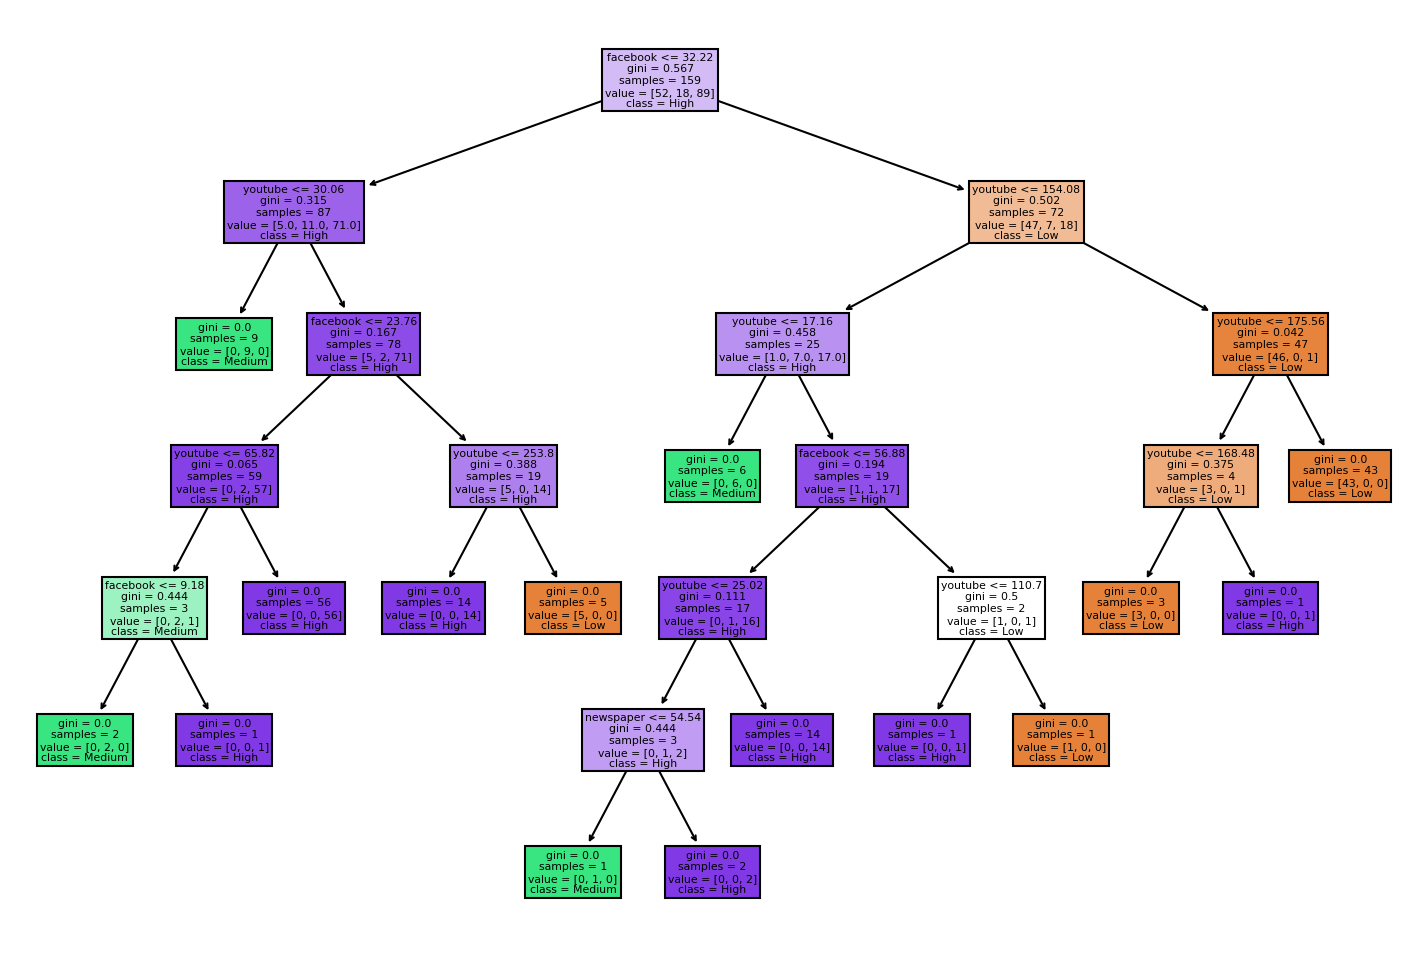

In [110]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8), dpi = 150)
tree.plot_tree(model, feature_names=['youtube', 'facebook', 'newspaper'], class_names=['Low', 'Medium', 'High'], filled=True)
plt.show()

In [111]:
# Predict
new_data = [[118, 63, 19], [34, 43, 14]]
predictions = model.predict(new_data)
predictions

array(['High', 'Medium'], dtype=object)